# Labeling Data

Using polylines from the cv2 package, we will label the data in a similar way to the industry standard TuSimple dataset for lanedetection.

In [1]:
# Front Matter
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import glob as g

## Functions Used

`get_hsamples` <br>
This is one of the fundamental points in the labeling. As perscribed in the TuSimple dataset documenation, we want to sample a horizontal pixal plane at regular intervals in the perscribed area (i.e., where the lanes are).

`get_lane_pts` <br>
Once you manually define the curved points of the lane, this function located all the points along each horizontal sample that you marked with a particular color.

In [22]:
# Function for pulling out h_samples
def get_hsamples(img, y_intercept, interval):
    h_samples = [y_intercept]
    yrange = img.shape[0] - y_intercept
    # adding all y_intercepts to h_samples list
    for x in range(math.floor(yrange/interval)):
        y_intercept += interval
        if y_intercept <= img.shape[0]:
            h_samples.append(y_intercept)
        else:
            break
    return h_samples


# Draw lines for visualization
def draw_hlines(img, h_samples):
    img_vis = img.copy()
    color = (255,0,0)
    size = 2
    for y in h_samples:
        ls = (0, y)
        le = (640, y)
        img_vis = cv2.line(img_vis, ls, le, color, size)
    plt.imshow(img_vis)
    plt.show()
    return img_vis

def draw_lane(img, start, end):
    img_vis = img.copy()
    size = 2
    color = (0, 255, 0)
    img_vis = cv2.line(img_vis, start, end, color, size)
    plt.imshow(img_vis)
    plt.show()
    return img_vis

# Function to view ground truth after deriving h_samples and lane points
def view_ground_truth(lane_gt, h_samples):
    gt_lanes_vis = [[(x, y) for (x, y) in zip(lane, h_samples) if x >= 0] for lane in lane_gt]
    img_vis = img.copy()

    for lane in gt_lanes_vis:
        for pt in lane:
            cv2.circle(img_vis, pt, radius=5, color=(0, 255, 0), thickness = 2)

    return img_vis
    #plt.imshow(img_vis)
    #plt.show()

In [3]:
# derives the points where the lane intersects the h_samples to establish the ground truth
def get_lane_pts(img, h_samples, Lane_marks):
    # create empty lane array
    all_lanes = []
    
    for mark in Lane_marks:
        img_vis = img.copy()
        lane_img = draw_lane(img_vis, tuple(mark[0]), tuple(mark[1]))   
        lane = []
        for h in h_samples:
            if np.array([0,  255,   0]) in lane_img[h][:]:
                count = 0
                for x in range(len(lane_img[h])):
                    if list(lane_img[h][x][:]) == [0,  255,   0]:
                        if count == 0:
                            lane.append(x)
                            count = 1
                        else:
                            pass
                    else:
                        pass
            else:
                lane.append(-2)
      
        all_lanes.append(lane)              
    
    return all_lanes

# Start manual labeling process

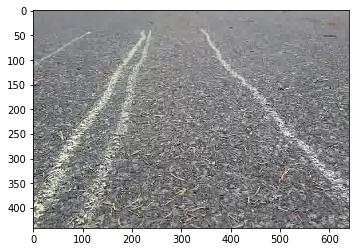

In [14]:
path = "../datasets/tusimple-test/clips/0008/0020/ezgif-frame-020.jpg"
img = plt.imread(path)
# Select the location where the road ends
###WARNING### Make sure intercept doesn't cause the last value to be 640
y_intercept = 199

# Establish visualization where the road is
plt.imshow(img[y_intercept:])
plt.show()

## For Image Clip 000X

Things that need to be predetermined: <br>

<ul> 
    <li>File path to the 20th image in the 1s video clip </li>
    <li>Use plt.imread(path) to read in the image</li>
    <li>Select the location where the road ends on the horizon. Assign y_intercept.</li>
    <li>Visualize to make sure that the y_intercept selection was appropriate</li>
</ul>

Establish visualization where the road is
plt.imshow(img[y_intercept:])
plt.show()

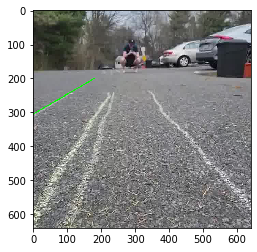

In [15]:
# find the right points for all lines
t = draw_lane(img, (0,305), (180,200))

In [16]:
# add points here
AW = np.array([ [(0,305), (180,200)], [(0,620), (240,200)], [(100,640), (250,210)], [(310,200), (640,580)] ])

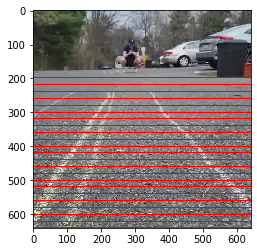

In [17]:
# See if the horizontal lines are correctly established
h_samples = get_hsamples(img, y_intercept, 20)
img_vis = draw_hlines(img, h_samples)

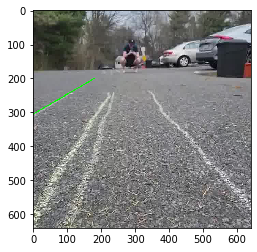

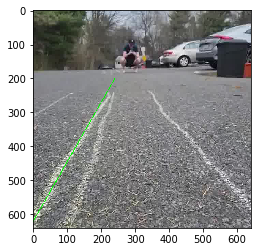

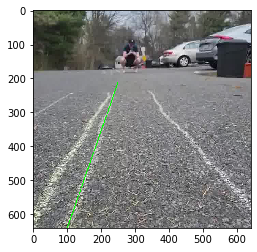

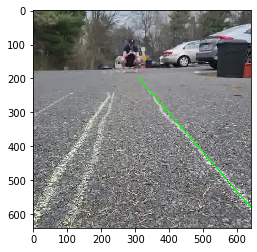

In [18]:
all_lanes = get_lane_pts(img, h_samples, AW)

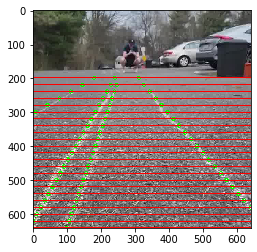

In [23]:
x = draw_hlines(view_ground_truth(all_lanes, h_samples), h_samples)

# Write to a JSON File
This is the final step in the process.

*WARNING* <br>
Make sure the file path is renamed so that you don't accidentally rewrite old files!

In [20]:
data = {
    "lanes" : all_lanes,
    "h_samples" : h_samples,
    "raw file" : path
}


# Writing to sample.json
with open("/storage/home/nak5437/scratch/LaneATT/datasets/personal/json_solo/label_data_0008.json", "w") as f:
    json.dump(data, f)
    f.close()

FileNotFoundError: [Errno 2] No such file or directory: '/storage/home/nak5437/scratch/LaneATT/datasets/personal/json_solo/label_data_0008.json'